# Implementing ANN -Dense Layers for text binary classification

# IMDB Reviews

In [60]:
import tensorflow
from tensorflow import keras 
import matplotlib.pyplot as plt
import pandas as pd

In [42]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [44]:

# word_index = imdb.get_word_index()
# reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
# decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

In [40]:
# reverse_word_index

In [41]:
# decoded_review

In [47]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))    
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

In [72]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [73]:
train_labels

array([1, 0, 0, ..., 0, 1, 0], dtype=int64)

In [74]:
train_labels.shape

(25000,)

In [75]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [76]:
from tensorflow.keras import models
from tensorflow.keras import layers
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [77]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

In [78]:
from tensorflow.keras import optimizers
model.compile(optimizer=optimizers.RMSprop(lr=0.001),loss='binary_crossentropy',metrics=['accuracy'])

In [79]:
from tensorflow.keras import losses
from tensorflow.keras import metrics
model.compile(optimizer=optimizers.RMSprop(lr=0.001),loss=losses.binary_crossentropy,metrics=[metrics.binary_accuracy])

# Validating your approach

In [80]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

In [81]:
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [82]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['acc'])
history = model.fit(partial_x_train,partial_y_train,epochs=20,batch_size=512,validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 143us/sample - loss: 0.5221 - acc: 0.7836 - val_loss: 0.3977 - val_acc: 0.8613
Epoch 2/20
15000/15000 [==============================] - 1s 69us/sample - loss: 0.3104 - acc: 0.9031 - val_loss: 0.3087 - val_acc: 0.8810
Epoch 3/20
15000/15000 [==============================] - 1s 69us/sample - loss: 0.2259 - acc: 0.9263 - val_loss: 0.2816 - val_acc: 0.8881
Epoch 4/20
15000/15000 [==============================] - 1s 79us/sample - loss: 0.1785 - acc: 0.9435 - val_loss: 0.2771 - val_acc: 0.8894
Epoch 5/20
15000/15000 [==============================] - 1s 85us/sample - loss: 0.1465 - acc: 0.9528 - val_loss: 0.2849 - val_acc: 0.8872
Epoch 6/20
15000/15000 [==============================] - 2s 106us/sample - loss: 0.1202 - acc: 0.9633 - val_loss: 0.3025 - val_acc: 0.8815
Epoch 7/20
15000/15000 [==============================] - 2s 109us/sample - loss: 0.0967 - acc: 0.9714 - val_loss:

In [83]:
type(history)

tensorflow.python.keras.callbacks.History

In [84]:
history.history

{'loss': [0.5221226207574209,
  0.31040905044078826,
  0.22588044191996257,
  0.1784660465955734,
  0.14653903834819793,
  0.12023947196801503,
  0.09665334742863974,
  0.07982441720366477,
  0.06586512958606085,
  0.05121171171863874,
  0.040938428884744645,
  0.03277115774750709,
  0.02547634470462799,
  0.018038573971390724,
  0.0159306845108668,
  0.008712490241229534,
  0.010179147887974978,
  0.004196275856345892,
  0.005687343764056762,
  0.0023395629692822694],
 'acc': [0.7836,
  0.90313333,
  0.9263333,
  0.94353336,
  0.9528,
  0.9633333,
  0.9714,
  0.97866666,
  0.9836,
  0.98753333,
  0.99113333,
  0.99373335,
  0.99506664,
  0.99733335,
  0.9974,
  0.99946666,
  0.9984,
  0.99986666,
  0.9993333,
  0.99993336],
 'val_loss': [0.3976599932193756,
  0.3087364273071289,
  0.2816356303215027,
  0.2770926570892334,
  0.28489263591766356,
  0.30253530921936034,
  0.3237911316871643,
  0.32727447900772094,
  0.3440609324455261,
  0.3860477480888367,
  0.39686929407119753,
  0.423

In [85]:
history.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

In [86]:
hist_dict = history.history

In [87]:
pd.DataFrame(hist_dict)

,loss,acc,val_loss,val_acc
0,0.522123,0.783600,0.397660,0.8613
1,0.310409,0.903133,0.308736,0.8810
2,0.225880,0.926333,0.281636,0.8881
3,0.178466,0.943533,0.277093,0.8894
4,0.146539,0.952800,0.284893,0.8872
5,0.120239,0.963333,0.302535,0.8815
6,0.096653,0.971400,0.323791,0.8814
7,0.079824,0.978667,0.327274,0.8849
8,0.065865,0.983600,0.344061,0.8822
9,0.051212,0.987533,0.386048,0.8767


In [88]:
loss = hist_dict['loss']
val_loss = hist_dict['val_loss']
acc = hist_dict['acc']
val_acc = hist_dict['val_acc']

Text(0.5, 0, 'Epochs')

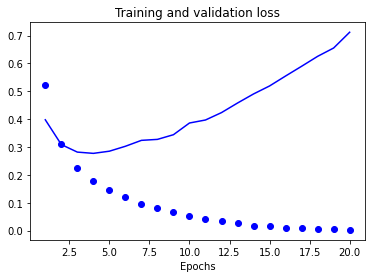

In [89]:
epochs = range(1, len(acc) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')

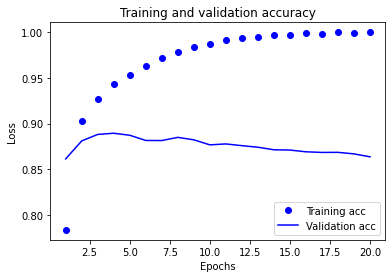

In [90]:
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [91]:
from tensorflow.keras import models
from tensorflow.keras import layers
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

In [92]:
model.fit(x_train, y_train, epochs=4, batch_size=512)


Train on 25000 samples
Epoch 1/4
25000/25000 [==============================] - 5s 202us/sample - loss: 0.4395 - accuracy: 0.8267
Epoch 2/4
25000/25000 [==============================] - 2s 73us/sample - loss: 0.2544 - accuracy: 0.9097
Epoch 3/4
25000/25000 [==============================] - 2s 68us/sample - loss: 0.1954 - accuracy: 0.9303
Epoch 4/4
25000/25000 [==============================] - 2s 66us/sample - loss: 0.1645 - accuracy: 0.9411


In [95]:
results = model.evaluate(x_test, y_test)

25000/25000 [==============================] - 2s 65us/sample - loss: 0.2952 - accuracy: 0.8840


In [96]:
results

[0.29515606085777285, 0.88396]

In [100]:
if model.predict(x_test[0].reshape(1,10000)) >0.5:
    print('Positive')
else:
    print("Negative")

Negative


In [99]:
y_test[0]

0.0

In [102]:
if model.predict(x_test[1].reshape(1,10000)) >0.5:
    print('Positive')
else:
    print("Negative")

Positive


In [103]:
y_test[1]

1.0

In [132]:
preview = input("Input your review:")
review = [review]
len(review)

Input your review:s


1

In [143]:
r1 = 'The film is a worthwhile watch. On a scale from zero to five, I give this film a five.' 
r2 =  'film literally brought tears to my eyes. I highly/strongly/definitely recommend the film.'
r3 = 'Film is such a boring movie and totally waste of time'

In [144]:
from sklearn.feature_extraction.text import CountVectorizer

In [145]:
vectorizer = CountVectorizer(binary=True,ngram_range=(1,1))

In [146]:
lst = []
lst.append(r1)
lst.append(r2)
lst.append(r3)

In [159]:
reviews = vectorizer.fit_transform(lst).toarray()
# vector = vectorizer.transform(document)
# print(vectorizer.get_feature_names())
# review = vector.toarray()


In [160]:
reviews

array([[0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
        1, 0, 1, 0, 0, 1, 1, 1],
       [0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1,
        0, 0, 1, 0, 0, 0, 0, 0],
       [1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
        0, 1, 0, 1, 1, 0, 0, 0]], dtype=int64)

In [172]:
import numpy as np
  
arr = [0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 1]
  
# padding array using CONSTANT mode
pad_arr = np.pad(arr, (5000), 'constant', 
                 constant_values=(0))
  
print(pad_arr.size)

10030


In [165]:
reviews[0]

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 1], dtype=int64)

In [163]:
padded_review = np.pad(reviews[0],(3,10000),'constant', constant_values=(0))